In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Opencv_master

/content/drive/MyDrive/Opencv_master


# Image filtering in Opencv

## Lowpass filtering

Une sorte de moyenne ou moyenne pondérée des pixels voisins

In [ ]:
baboon = plt.imread('baboon.jpg')
babblur = cv2.GaussianBlur(baboon,(29,29),0)

# kernel personnalisé
kernel = np.ones((15,15),np.float32)
kernel /= kernel.size # normaliser (sommme=1) avec l'aide de la taille du noyau

babblur2 = cv2.filter2D(baboon,-1,kernel) # ddepth nbr de bits aloués pour chaque pixel. 

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(baboon)
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(babblur)
plt.title('Gaussian blur')
plt.subplot(1,3,3)
plt.imshow(babblur2)
plt.title('Blur personnalisé')

##### `filter2D` est très général et peut faire beaucoup de choses différentes ; avec le bon noyau, vous pouvez tout aussi facilement faire du high-pass filtering

##  Median blurring
L'élément central de l'image est remplacé par la médiane de tous les pixels de la zone du noyau. Cette opération conserve les contours tout en supprimant le bruit.

In [25]:
liste = [5,4,3,8,9] # len paire & impaire
print(sorted(liste))
np.median(liste)

[3, 4, 5, 8, 9]


5.0

Text(0.5, 1.0, 'cartonifiée')

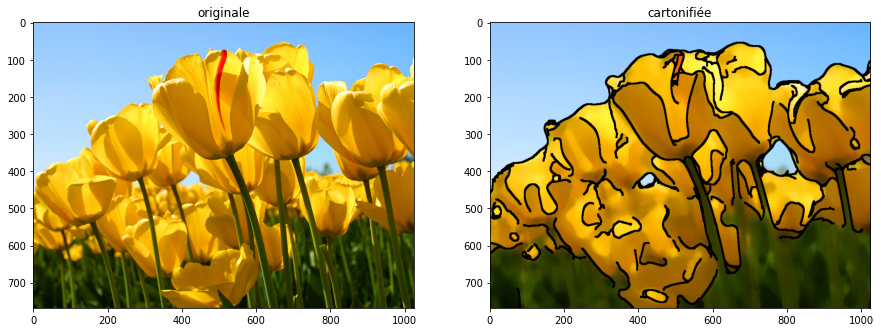

In [26]:
# Median blurring est un filtre préservant les contours
# Démonstration de median-blur pour "cartonifier" une image réelle
tulips = plt.imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips,29)


# Nous allons voir "Canny edge detection" et "dilation" très prochainement
edge = cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge = cv2.dilate(edge,kernel,iterations = 1)
tublur[edge==255]=0

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(tulips)
plt.title('originale')
plt.subplot(1,2,2)
plt.imshow(tublur) 
plt.title('cartonifiée')

#### Exercise:
`Non-local means filtering` est une méthode de débruitage (denoising) puissante.  
Lire cet article et essayer d'utiliser le code

https://docs.opencv.org/4.0.1/d5/d69/tutorial_py_non_local_means.html

## Highpass filtering
Répond aux changements spatiaux des images.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/%C3%84%C3%A4retuvastuse_n%C3%A4ide.png/500px-%C3%84%C3%A4retuvastuse_n%C3%A4ide.png">

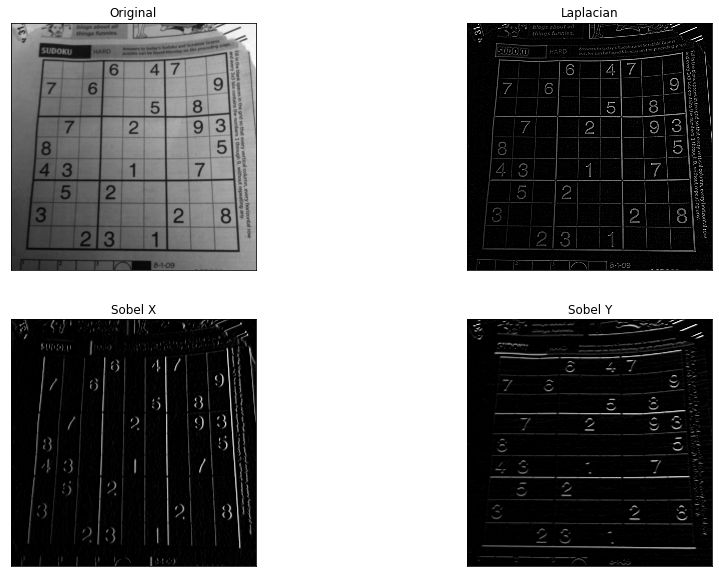

In [35]:
img = cv2.imread('sudokubig.jpg',0)
 
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # dx,dy = 1,0
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) # dx,dy = 0,1
 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.clim([0, 45])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.clim([0, 4500])
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.clim([0, 4500])

# se débarrasser de la région avec des valeurs constantes

## Canny edge detection

Text(0.5, 1.0, 'Edge Image')

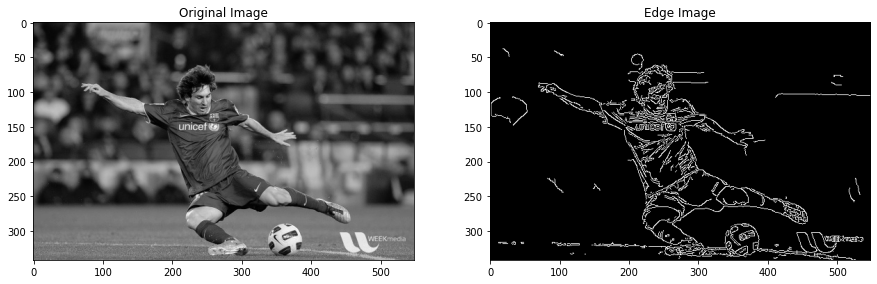

In [38]:
#lire la théorie ici:
#https://docs.opencv.org/4.0.1/da/d22/tutorial_py_canny.html

img = cv2.imread('messi5.jpg',0) #notez que le dernier paramètre 0 convertit l'image en niveaux de gris
edge=cv2.Canny(img,100,200) # 100,200 niveaux de seuil dependant combient vous etes sensible,
                            # il n y a pas une formule magique pour avoir de bonne resultats.
                            # il faut tester 
 
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(edge,cmap = 'gray')
plt.title('Edge Image')


## Opérations morphologiques:
Modification des masques binaires
génralement pour améliorer la qualité informationnelle d’une image numérique. via soit :

```
Erosion
Dilation
Opening (erosion suivie dilation)
Closing (inverse de Opening)
Binary operations
.....
```



Découvrez les différentes opérations [ici](http://docs.opencv.org/4.0.1/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0)
et 
[ici](https://openclassrooms.com/fr/courses/5060661-initiez-vous-aux-traitements-de-base-des-images-numeriques/5217276-maitrisez-les-operations-morphologiques-de-base)

In [88]:
np.mgrid[-1:1:0.01,-1:1:0.01].shape

(2, 200, 200)

Text(0.5, 1.0, 'flood-filled')

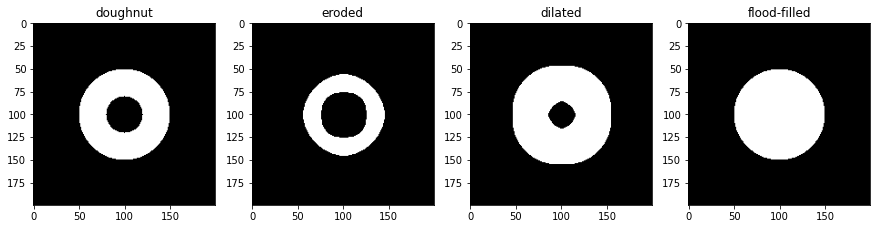

In [93]:
#créer une image/un masque de beignet/cercle de 0 et de 1
grid=np.mgrid[-1:1:0.01,-1:1:0.01]
yy=grid[0]
xx=grid[1]
circ = 0*xx
circ[xx**2+yy**2 < 0.5**2 ]=1
circ[xx**2+yy**2 < 0.2**2 ]=0
 
#Application d'un simple kernel
kernel = np.ones((10,10),np.float32)

#Essayons quelques opérations morphologiques
erosion = cv2.erode(circ,kernel,iterations=1)

dilation = cv2.dilate(circ,kernel,iterations=1)

remplire = cv2.floodFill(image=circ.astype(np.uint8).copy(),mask=None,seedPoint=(100,100),newVal=1)
            # seedPoint=(100,100) le centre de l'image
            # affecter une valeur de newVal=1 à tous les pixels similaires qui entoure le centre
 
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(circ,cmap='gray')
plt.title('doughnut')
plt.subplot(1,4,2)
plt.imshow(erosion,cmap='gray')
plt.title('eroded')
plt.subplot(1,4,3)
plt.imshow(dilation,cmap='gray')
plt.title('dilated')
plt.subplot(1,4,4)
plt.imshow(remplire[1].astype(np.float32),cmap='gray')
plt.title('flood-filled')

## Adaptive Thresholding

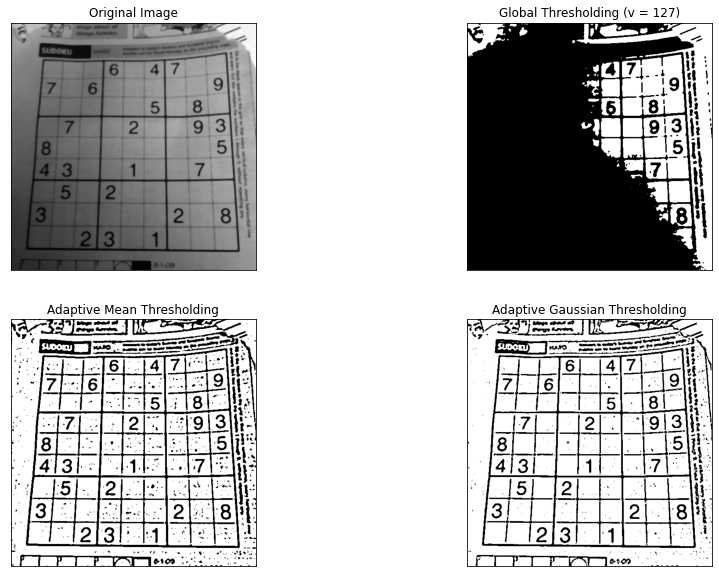

In [98]:
#comparons le hard thresholding to adaptive thresholding
#toute valeur inferieur  une seuil =0 et toute valeur superieur à cette seuil =1
# très intuitive mais le problème c'est de trouver la bonne seuil
# et plus dur aussi dans le cas des images qui n'ont pas une luminance uniforme

img = cv2.imread('sudokubig.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,11,2)
        #
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,11,2)
 
titles = ['Image originale', 'Seuillage global (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

# adaptive compare chaque pixel avec les pixels de sa région
# ADAPTIVE_THRESH_MEAN_C (mean average) meme poids pour different pixel
# ADAPTIVE_THRESH_GAUSSIAN_C (weithed average) poids different selon la distance